<a href="https://colab.research.google.com/github/prog815/lernDLpython/blob/master/save_and_restore_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# предсказание расхода топлива (регрессия)

Енин А.В.

Оренбург

19.08.2019

[VK](https://vk.com/alekseyenin)
[OK](http://ok.ru/profile/404477133)
[Twitter](https://twitter.com/EninAleksey)
[FB](https://www.facebook.com/alex.prog.1)
[Telegramm](https://t.me/AleseyEnin)
[Habr](https://habr.com/ru/users/eavprog/posts/)
[VC](https://vc.ru/u/262921-aleksey-enin)
[GitHub](https://github.com/prog815/lernDLpython)

Образец

https://www.tensorflow.org/tutorials/keras/basic_regression

# Подключем библиотеки

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Иппортируем данные

Датасет Auto MPG

Датасет доступен в репозитарии машинного обучения UCI.

## подкачиваем набор

In [0]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data -O auto-mpg.data

--2019-08-20 12:54:33--  http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: ‘auto-mpg.data’

auto-mpg.data       100%[===================>]  29.58K  --.-KB/s    in 0.1s    

2019-08-20 12:54:34 (227 KB/s) - ‘auto-mpg.data’ saved [30286/30286]



In [0]:
!ls -l

total 36
-rw-r--r-- 1 root root 30286 Jul  8  1993 auto-mpg.data
drwxr-xr-x 1 root root  4096 Aug  2 16:06 sample_data


In [0]:
!head auto-mpg.data

18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"
15.0   8   429.0      198.0      4341.      10.0   70  1	"ford galaxie 500"
14.0   8   454.0      220.0      4354.       9.0   70  1	"chevrolet impala"
14.0   8   440.0      215.0      4312.       8.5   70  1	"plymouth fury iii"
14.0   8   455.0      225.0      4425.      10.0   70  1	"pontiac catalina"
15.0   8   390.0      190.0      3850.       8.5   70  1	"amc ambassador dpl"


In [0]:
column_names = ['Расход топлива','Кол-во цилиндров','Объем двигателя','Л.с.','Вес',
                'Разгон до 100 км/ч', 'Год выпуска', 'Страна выпуска','Марка']

## загружаем набор в тетрадку

In [0]:
row_dataset = pd.read_csv('auto-mpg.data',sep=' ',names=column_names,na_values='?',comment='\t',skipinitialspace=True)
row_dataset.tail()

,Расход топлива,Кол-во цилиндров,Объем двигателя,Л.с.,Вес,Разгон до 100 км/ч,Год выпуска,Страна выпуска,Марка
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,NaN
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,NaN
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,NaN
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,NaN
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,NaN


In [0]:
dataset = row_dataset.copy()

## откидываем плохие

In [0]:
dataset.isna().sum()

Расход топлива          0
Кол-во цилиндров        0
Объем двигателя         0
Л.с.                    6
Вес                     0
Разгон до 100 км/ч      0
Год выпуска             0
Страна выпуска          0
Марка                 398
dtype: int64

In [0]:
dataset = dataset.drop(columns=['Марка'],axis=1) ;

In [0]:
dataset.isna().sum()

Расход топлива        0
Кол-во цилиндров      0
Объем двигателя       0
Л.с.                  6
Вес                   0
Разгон до 100 км/ч    0
Год выпуска           0
Страна выпуска        0
dtype: int64

In [0]:
dataset = dataset.dropna() ;
dataset.shape

(392, 8)

In [0]:
dataset.isna().sum()

Расход топлива        0
Кол-во цилиндров      0
Объем двигателя       0
Л.с.                  0
Вес                   0
Разгон до 100 км/ч    0
Год выпуска           0
Страна выпуска        0
dtype: int64

## столбцы трех стран

In [0]:
orig = dataset.pop('Страна выпуска')

In [0]:
dataset['Америка'] = (orig == 1)*1.0
dataset['Европа'] = (orig == 2)*1.0
dataset['Япония'] = (orig == 3)*1.0
dataset.tail()

,Расход топлива,Кол-во цилиндров,Объем двигателя,Л.с.,Вес,Разгон до 100 км/ч,Год выпуска,Америка,Европа,Япония
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


# Выделение тестовой выборки

In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
train_dataset.shape

(314, 10)

In [0]:
test_dataset = dataset.drop(train_dataset.index)
test_dataset.shape

(78, 10)

# Анализ данных тренировочной выборки

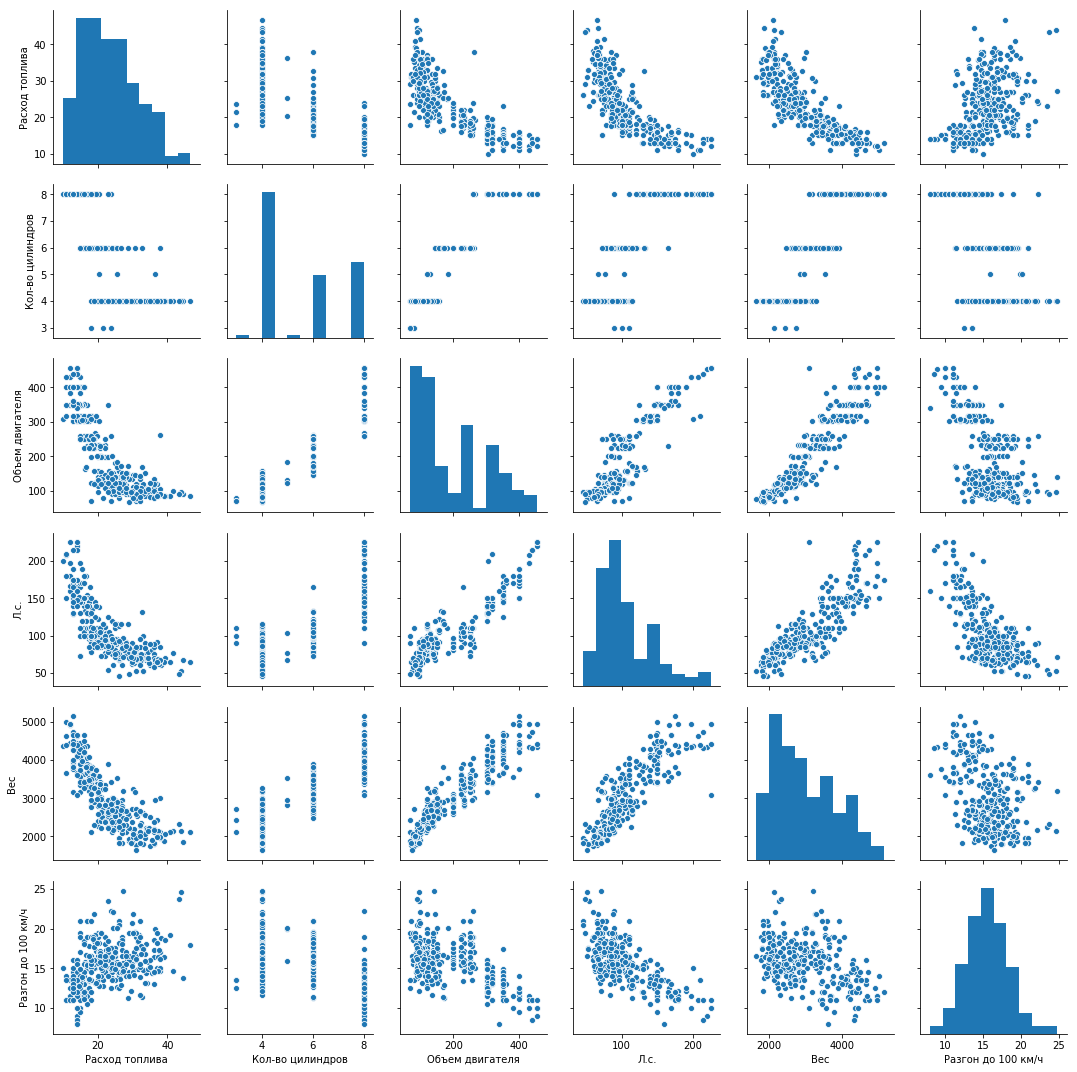

In [0]:
sns.pairplot( train_dataset[train_dataset.columns[:6]])

In [0]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Расход топлива,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Кол-во цилиндров,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Объем двигателя,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Л.с.,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Вес,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Разгон до 100 км/ч,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Год выпуска,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Америка,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Европа,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Япония,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


# Выделение маркеров

In [0]:
train_labels = train_dataset.pop('Расход топлива')
test_labels = test_dataset.pop('Расход топлива')

In [0]:
train_labels.describe()

count    314.000000
mean      23.310510
std        7.728652
min       10.000000
25%       17.000000
50%       22.000000
75%       28.950000
max       46.600000
Name: Расход топлива, dtype: float64

# Нормализация входных данных

In [0]:
mean_dataset = train_dataset.mean()
std_dataset = train_dataset.std()

In [0]:
norm_train_dataset = (train_dataset - mean_dataset) / std_dataset
norm_test_dataset = (test_dataset - mean_dataset) / std_dataset

In [0]:
norm_train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Кол-во цилиндров,314.0,2.093159e-16,1.0,-1.457657,-0.869348,-0.869348,1.483887,1.483887
Объем двигателя,314.0,1.018294e-16,1.0,-1.220325,-0.860894,-0.424785,0.675074,2.489002
Л.с.,314.0,-1.909301e-17,1.0,-1.545283,-0.751241,-0.272190,0.607162,3.153347
Вес,314.0,-9.723291e-17,1.0,-1.589352,-0.869478,-0.198782,0.732017,2.547401
Разгон до 100 км/ч,314.0,2.688832e-15,1.0,-2.710152,-0.630725,-0.021237,0.588250,3.313017
Год выпуска,314.0,9.561531e-16,1.0,-1.604642,-0.788458,0.027726,0.843910,1.660094
Америка,314.0,6.081476e-17,1.0,-1.286751,-1.286751,0.774676,0.774676,0.774676
Европа,314.0,8.485781e-18,1.0,-0.465148,-0.465148,-0.465148,-0.465148,2.143005
Япония,314.0,3.164489e-17,1.0,-0.495225,-0.495225,-0.495225,-0.495225,2.012852


# Первая безостановочная модель

## Построение модели

In [0]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64,activation=tf.nn.relu,input_shape=[len(train_dataset.keys())]), 
        layers.Dense(64,activation=tf.nn.relu),
        layers.Dense(1)
    ])
    optimizer = tf.train.RMSPropOptimizer(0.001)
    model.compile(loss=tf.losses.mean_squared_error,optimizer=optimizer,metrics=['mae','mse'])
    return model

In [0]:
model = build_model()
model.summary()

W0820 12:54:47.452631 140202508621696 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0820 12:54:47.592144 140202508621696 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/losses/losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


## Обучение

In [0]:
EPOCHS = 1000
history = model.fit(norm_train_dataset,train_labels,epochs=EPOCHS,validation_split=0.2,verbose=0)

W0820 12:54:47.744434 140202508621696 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/rmsprop.py:119: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Графики истории обучения

In [0]:
hist = pd.DataFrame( history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.635062,0.997504,2.635062,8.165150,2.188304,8.165151,995
996,2.682493,1.000938,2.682493,8.213327,2.154905,8.213326,996
997,2.727530,1.011266,2.727530,8.855328,2.281032,8.855328,997
998,2.627858,1.041419,2.627858,8.383105,2.210093,8.383105,998
999,2.520901,0.963680,2.520901,8.147914,2.171110,8.147914,999


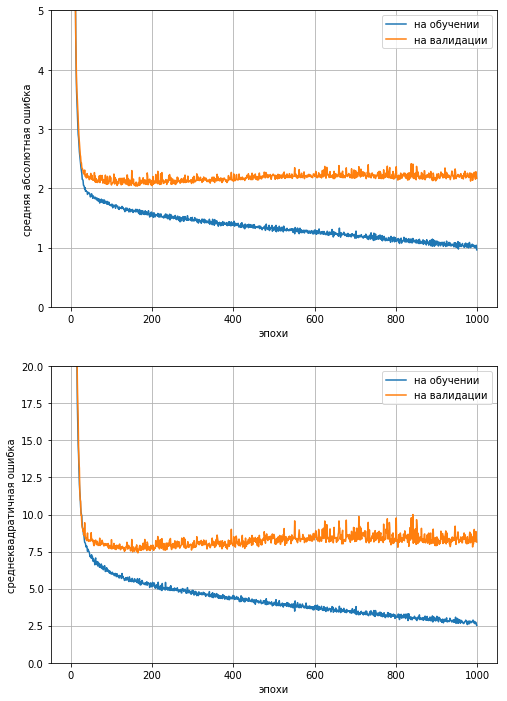

In [0]:
def plot_hist(history):
  hist = pd.DataFrame( history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.plot(hist['epoch'],hist['mean_absolute_error'],label='на обучении')
  plt.plot(hist['epoch'],hist['val_mean_absolute_error'],label='на валидации')
  plt.legend()
  plt.xlabel('эпохи')
  plt.ylabel('средняя абсолютная ошибка')
  plt.ylim(0,5)
  plt.grid()

  plt.subplot(2,1,2)
  plt.plot(hist['epoch'],hist['mean_squared_error'],label='на обучении')
  plt.plot(hist['epoch'],hist['val_mean_squared_error'],label='на валидации')
  plt.legend()
  plt.xlabel('эпохи')
  plt.ylabel('среднеквадратичная ошибка')
  plt.ylim(0,20)
  plt.grid()

  plt.show()

plot_hist(history)

## смотрим на тесте

In [0]:
model.evaluate(norm_test_dataset,test_labels)

78/78 [==============================] - 0s 110us/sample - loss: 6.9873 - mean_absolute_error: 2.0396 - mean_squared_error: 6.9873


[6.987333909059182, 2.039631, 6.987334]

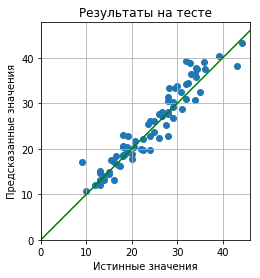

In [0]:
def test_plot():
  test_pred = model.predict(norm_test_dataset)

  plt.scatter(test_labels,test_pred)
  plt.xlabel('Истинные значения')
  plt.ylabel('Предсказанные значения')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim(0,plt.xlim()[1])
  plt.ylim(0,plt.ylim()[1])
  plt.plot([-100,100],[-100,100],'g')
  plt.grid()
  plt.title('Результаты на тесте')
  plt.show()

test_plot()  

# Вторая остановочная модель

## Построение модели

In [0]:
model = build_model()

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


## обучение модели

In [0]:
early_stop = keras.callbacks.EarlyStopping('val_loss',patience=50)

history = model.fit(norm_train_dataset,train_labels,epochs=EPOCHS,validation_split=0.2,verbose=0,callbacks=[early_stop])

## графики истории обучения

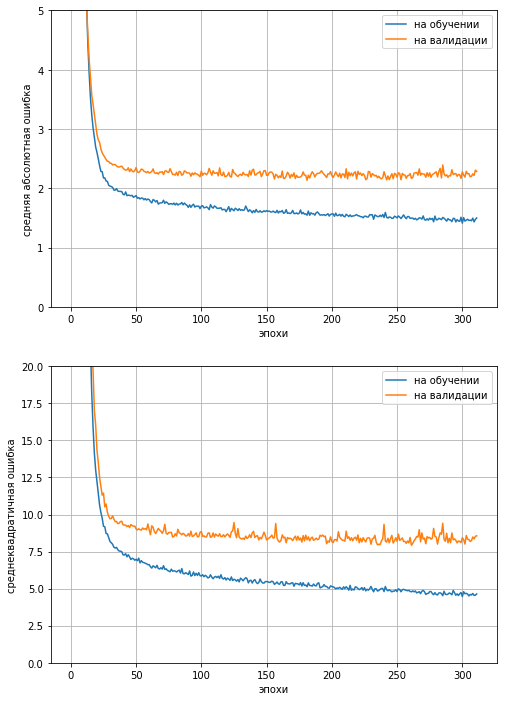

In [0]:
plot_hist(history)

## тестирование модели

In [0]:
model.evaluate(norm_test_dataset,test_labels)

78/78 [==============================] - 0s 142us/sample - loss: 5.4425 - mean_absolute_error: 1.8095 - mean_squared_error: 5.4425


[5.442495884039463, 1.8095068, 5.442496]

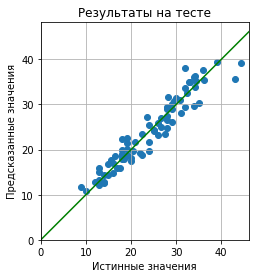

In [0]:
test_plot()